<a href="https://colab.research.google.com/github/reflectormensah/Financial-Engineering-Data-Science/blob/main/Codebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mean Reversion in U.S. Equities

*Mean Reversion in Financial Markets* (Topic 3-2, Research track)

**Group 7108**: Reflector Mensah, Yuhua Ren

**Instructor**: Prof. Ken Abbott

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels                     # for ACF plots
import statsmodels.api as sm           # for various stats tests
import yfinance as yf

# np.random.seed(42)

Note: Please refer to the HTML version of the report for better formatting. To reproduce the work, the full code is available on [Github](https://github.com/YH-R/Mean_Reversion_7108) and in [Google Colab](https://colab.research.google.com/drive/1Oq5lmYp8M_1kqzB5rjfEB4PCipKEpIdu#scrollTo=7aPXfukpPg8U).


# Abstract

Mean reversion is a key component in many statistical arbitrage strategies. Although mean reversion is prevalent in several markets, the economic forces behind them are not often well understood. In this paper, we present a systematic method to understand and characterize mean-reverting behaviors. We show that our characterization accurately predicts the mean reversion parameters with Monte Carlo simulations. We come up with simple trading rules to effectively capture the profit when the spread diverges beyond a certain limit. Based on our findings, we implement the trading strategy on real price data from companies in the S&P 500.

<font color='red'>
To be updated later when we have all the results.
</font>

# Introduction

## What is Mean Reversion?

Mean reversion refers to the hypothesis that although short-term chart movements are difficult to predict, prices inevitably revert to their historical mean in the long run. We stress the word hypothesis as it is based on observations, and the behavior is not universal or proven consistent. Nevertheless, mean-reversion provides investors with a benchmark to determine whether an asset's current price is overvalued or undervalued, and can be useful in timing trades—provided it is approached with a healthy dose of skepticism.

The simplest form of statistical arbitrage involves only two assets. After identifying a pair of highly correlated assets with a pricing discrepancy, the investor enters into a long-short position that is overall market neutral. The investor stands to profit when the two prices eventually converge back to their historical correlation. Thus, the first step would be to identify two assets that tend to move in tandem. For stocks, companies in the same sectors are a good starting point, and below are some intuitive candidates,

- Coca-Cola and PepsiCo
- Visa and Mastercard
- Ford and General Motors
- Royal Dutch Shell and BP

Mean reversion is not just limited to equities, although equities will be the focus of this thesis. For fixed income, one can compare the spread due to different maturities, or issuer's credit qualities. For currencies, one can look out for discrepancies between spot rates and non-deliverable forwards (NDFs). Often, there is an underlying economical reason for a mean-reverting pair, and having a convincing story is as important as the statistical methods used to identify such pairs.

## Quantifying Mean Reversion

In the simplest case, the spread between two assets assumed to exhibit mean-reverting behavior can be described as a (weak-sense) stationary process. To test for stationarity, one can use statistical tests like the Augmented Dickey-Fuller (ADF) test. An important point to note is that (the returns of) two series being correlated does not guarantee mean-reverting behavior [(Toit, 2021)](https://hudsonthames.org/an-introduction-to-cointegration/). The more appropriate property would be cointegration, a concept first developed by Nobel laureate Granger and his colleagues [(Granger, 1981)](https://doi.org/10.1016/0304-4076(81)90079-8).
> $X_t$ and $Y_t$ are cointegrated, if $X_t$ and $Y_t$ are $I(1)$ series and there exists $\kappa$ such that the residual, $Z_t = X_t - \kappa Y_t$, is an $I(0)$ series.  

For mean reversion, we postulate that $Z_t$ will return to a fixed level $\mu$ given enough time. Some ways to test for cointegration are the Engle-Grangle cointegration test [(Engle, 1987)](https://doi.org/10.2307/1913236) or the Johansen test [(Johansen, 1991)](https://doi.org/10.2307/2938278), which are available in the Python module `statsmodels`. From a practitioner's point of view, one would be more concerned with estimating the mean, and detecting if there is significant deviation from it. If only we have the cointegration coefficient $\kappa$, also known as the hedge ratio, then a pair trading strategy can be implemented to trade $X$ and $Y$. Therefore, the first step would be to characterize the mean reversion behavior using real-world data.

One popular choice for estimating the mean is to use the moving average. We can periodically check if a short-term average (e.g. 50 days) deviates significantly from a longer-term average (e.g. 200 days). A similar idea is to monitor when the price crosses the Bollinger bands, traditionally defined as two standard deviations away from the moving average. If higher quality data is available, the volume-weighted average price (VWAP) may be a more robust benchmark against imbalanced order books and even spoofing behaviors. Lastly, the relative strength index (RSI) [(Wilder, 1978)](https://openlibrary.org/books/OL25090843M/New_concepts_in_technical_trading_systems) is also a commonly used momentum indicator to identify overbought/oversold conditions.

For a more in-depth discussion, we refer interested readers to the [WQU Financial Econometrics course](https://learn.wqu.edu/my-path/courses/financial-econometrics).

# Literature

For a broad view of the mean reversion behavior in international stock markets, we turn to the article by Spierdijk [(Spierdijk, 2010)](https://doi.org/10.1016/j.jimonfin.2011.11.008). The authors tracked the speed of the mean reversion using a rolling window approach and discovered that the speed fluctuates greatly, with the highest record mostly during periods of crisis. In another relevant study [(Avellaneda, 2008)](https://doi.org/10.1080/14697680903124632), the authors compared using principal component analysis (PCA) against using sector exchange-traded funds (ETFs) to generate trading signals for a mean reversion strategy.

An important consideration in any trading strategy is to account for trading costs, which include fees and slippage. This is strongly influenced by when often positions are opened or closed, and is particularly concerning for high-frequency statistical arbitrage strategies. In the paper by Leung et al. [(Leung, 2014)](https://doi.org/10.48550/arXiv.1411.5062), the authors developed a framework to determine the best entry and exit points. In a related study [(Bertram, 2009)](http://dx.doi.org/10.2139/ssrn.1505073), Bertram derived an analytical solution of trading an asset modeled by the Ornstein-Uhlenbeck (OU) process, with the objective being to maximize the expected return.

An interesting article presented by Velissaris et al. [(Velissaris, 2010)](http://dx.doi.org/10.2139/ssrn.1666799) suggests that mean reversion strategies could use some ideas from momentum trading. In their article, the authors use portfolio optimization techniques to improve a momentum strategy, and it was able to perform well in both the 2008 recession and subsequent bull market. Their conclusion is also supported by another work [(Balvers, 2006)](https://doi.org/10.1016/j.jempfin.2005.05.001). The authors showed that combining momentum and contrarian ideas outperforms both pure momentum and pure contrarian strategies in 18 developed equity markets.

Mean reversion behavior is not limited to equities. According to Bali et al. [(Bali, 2008)](http://dx.doi.org/10.2139/ssrn.936647), the authors used GARCH modeling with thin-tailed, normal, and fat-tailed distributions, and found a mean-reverting behavior in the stochastic volatility. In recent the study by Lubnau [(Lubnau, 2015)](https://doi.org/10.1016/j.eneco.2015.06.018), the authors claimed their strategy of using calendar spread portfolios of power and gas futures achieved a Sharpe ratio exceeding 2 in many cases involving WTI Crude Oil and Natural Gas.

# Methodology

## Estimating Reversion Speed

For statistical arbitrage strategies, the frequency of trade is of utmost importance. If the rebalancing is done too often, the trading costs and slippage will eat into the profit. On the other hand, some pricing inefficiencies only last a couple of seconds and will be missed by slower strategies. Thus, quants will need to decide on the optimal trading frequency, which depends critically on the speed of mean reversion, which in general varies across asset classes.

One econometric method to estimate the mean reversion speed is to fit an Ornstein-Uhlenbeck (OU) process [(Uhlenback, 1930)](https://doi.org/10.1103/PhysRev.36.823). The OU process is defined by the following stochastic differential equation
$$
d Z_t​ = \theta(\mu−Z_t) dt + \sigma d W_t​ ,
$$
where

- $Z_t$ is the value of the mean-reverting process at time $t$,
- $W_t$ is a standard Wiener process at time $t$,
- $\theta$ is the speed of mean reversion,
- $\mu$ is the long-term mean level,
- $\sigma$ is the volatility.

Ideally, we want to trade a spread with high speed, high volatility, and a mean close to zero. Note that we can standardize the mean and variance of $Z_t$ by defining $z_t \equiv (Z_t - \mu)/\sigma$. Then $z_t$ will be an OU process with $\mu=0$ and $\sigma=1$. Another name for $z_t$ is the z-score, and it is a dimensionless quantity that can tell us whether a spread is too large. We can simulate $Z_t$ by first generating $z_t$ and then applying the affine transform.

The OU process is one of those rare instances where the SDE [can be integrated](https://planetmath.org/analyticsolutiontoornsteinuhlenbecksde),
$$
Z_t = Z_0 e^{-\theta t} + \mu (1 - e^{-\theta t}) + \sigma \int_0^t e^{\theta (s-t)} d W_s .
$$

For the last term on the R.H.S., the stochastic integral of a deterministic integrand with respect to the Brownian motion is normally distributed. In the real world, the observation is usually done at discrete intervals, say $\Delta t$, which is taken to be small. What is the meaning of small here? The only length scale for time is given by $\theta$, so small means $\theta \Delta t \ll 1$. By writing the process at regular timesteps as $\zeta_k \equiv Z_{k\Delta t}$, we obtain a recurrence relation, which is in fact an AR(1) process.
$$
\zeta_{k+1} = \beta \zeta_k + \alpha + \sigma \sqrt{\frac{1-\beta^2}{2\theta}} \epsilon_k ,
$$

where the new variables are

- $\beta = e^{-\theta \Delta t}$,
- $\alpha = \mu (1-\beta)$,
- $\epsilon_k \sim \mathcal{N}(0, 1)$.

In some cases, we don't know $\beta$, but we are presented with the mean-reverting time series $\zeta_k$. Using the Maximum Likelihood Estimation, we can estimate the desired parameters derived from the first-order conditions [(Tang, 2009)](https://doi.org/10.1016/j.jeconom.2008.11.001).
\begin{align*}
  \hat{\beta}
  &= \frac{
    N (\sum \zeta_{k} \zeta_{k-1}) - \sum \zeta_{k} \sum \zeta_{k-1}
  }{
    N (\sum \zeta_{k-1}​^2​ ) - (\sum \zeta_{k-1})^2
  } \\
  \hat{\alpha}
  &= \frac{1}{N} \sum ​(\zeta_{k}​ − \hat{\beta} \zeta_{k-1}) =​ (1-\hat{\beta}) \frac{\sum ​\zeta_{k}​ }{N} + \frac{\hat{\beta}}{N} (\zeta_N - \zeta_0) \\
  \hat{\sigma}^2
  &= \frac{2 \hat{\theta}}{1-\hat{\beta}^2}
  \frac{1}{N} \sum ​(\zeta_{k}​​ − \hat{\beta} \zeta_{k-1} ​− \hat{\alpha})^2
\end{align*}

From the formulas, we recognize that the estimation of $\alpha$ and $\beta$ is essentially doing an OLS fit of $\zeta_k$ against $\zeta_{k-1}$, and $\hat{\sigma}^2 (1-\hat{\beta}^2)/(2\hat{\theta})$ is the (minimized) mean of squared residuals. In the limit of large $N$, we see that $\hat{\mu} = \hat{\alpha}/(1-\hat{\beta})$ is just the simple average $\sum ​\zeta_k​ / N$.

After all the trouble of estimating the OU process parameters, how do we know if our data is even well described by the OU process? According to the solution of the OU process, its unconditional [autocovariance](https://en.wikipedia.org/wiki/Ornstein%E2%80%93Uhlenbeck_process#Mathematical_properties) follows an exponential decay of the time difference,
$$
\operatorname{Cov}(Z_t, Z_s) = \frac{\sigma^2}{2\theta} e^{-\theta|t-s|} .
$$

Therefore, we expect its autocorrelation function (ACF) to decay exponentially.
$$
\operatorname{ACF}(k) \equiv \frac{
  \operatorname{Cov}(Z_t, Z_{t+k\Delta T})
}{
  \sqrt{\operatorname{Var}(Z_t) \operatorname{Var}(Z_{t+k\Delta T})}
} \\
= e^{-k \theta \Delta t}
$$

So far, we have assumed that our data is well explained by an OU process. But even so, the OU parameters might change over time, such as during a financial crisis, which is also called a "regime shift". Our view is to choose only the stocks so that their estimated parameters do not change a lot with time. If the parameters are constantly updated, there is a tendency for the model to overfit. We assume that our data is drawn from a fixed OU process, and any extreme observations are ascribed to the intrinsic randomness of the stochastic process.

## Trading Rules

The idea is that we constantly monitor how much the spread deviates from the equilibrium level. If it is too high or too low, then we will enter into the trade. When the price goes back to normal, we will unwind the position. Short selling is a requirement for any mean reversion strategy, and we assume there are no restrictions on it. Now the question boils down to defining what is "too large", "too small" or "normal". Suppose our spread is written as
$$
Z_t = Y_t - \kappa X_t = \mu + \sigma z_t
$$

It is easier to frame the trading rules in terms of the standardized $z_t$, as we do not need to worry about $\mu$ and $\sigma$. Also, $X_t$ and $Y_t$ will represent the log of stock prices, not the actual price. Since we are modeling with the log price, there is also strong physical intuition that $\kappa$ should be close to 1, since the percentage change of stocks should be roughly aligned. The only major difference is in the market capitalization, which affects the intercept term.

Another key insight is that the (expected) rate of reversion is stronger when the process is further away from the equilibrium level. Furthermore, the series is always expected to revert given enough time, and the profit is fixed per round trip, so the role of the reversion speed only affects the rate of profit.

In actual trading, we need to account for losses arising from broker fees, bid-ask spread, and slippage. There are ways to model these costs with varying complexities, and the simplest among them is the fixed-cost model. We could impose a \\$5 penalty for every trade made. However, a strategy can easily nullify the effect of a fixed cost by making a large trade, since the cost does not scale with the potential profits. Therefore, we need to have at least a linear cost model, and here we will take the cost to be 0.5% of the value of trade, for both short and long positions.

$$
C(x) = 0.005 |x|
$$

We note that slippage is usually worse for larger trades, and thus a linear cost might not be the best, but we appeal to Occam's Razor and chose a simple model. Another assumption we make is that by trading in small quantities, we do not create any market impact.

In the long run, we expect the spread to be distributed normally about $\mu$, with variance given by $\frac{\sigma^2}{2\theta}$. The dilemma we face is the following: By trading more frequently, our profit margin is narrower, and the cost is larger. What we want is to maximize the quantity
$$
\textrm{profit rate} = \textrm{profit per trade} \times \textrm{trading rate}
$$

However, this optimization is easier said than done, for it involves solving for the first-hitting time distribution for the OU process. We will take a heuristic approach instead. We choose a threshold level and enter into a long-short position whenever the spread breaks the threshold. We then unwind the position when the spread recovers to zero. From our numerical testing, we found that $\pm \sigma$ is a good threshold to use.

To prevent devastating losses, we also incorporate stop loss into our strategy. This is a delicate business as the stop loss will sometimes cause premature exits and result in a loss. Here, we will consider a time-based stop loss. If the mean-reversion does not take place after a certain amount of time, it could mean that a regime shift has occurred. For example, we could limit the maximum amount of time to hold on to the position to 10 half-lives. This takes into account the speed of the reversion and ensures that we do not set the stops to be too tight or loose.

Below, we give a summary of our trading strategy in point form.

- Enter trade when spread exceeds $\pm \sigma$.
  - The long-short position will have $1 in each leg.
- Unwind when spread crosses zero, or when the positions are held for 5 half-lives.

## Finding Mean-Reverting Pairs

To find mean-reverting pairs, we need to test for significant cointegration. The number of possible pairings scales quadratically with the universe size. Therefore, we ease the computation workload by only looking for pairs among the same sector. This also brings the benefit that there is financial reasons for having a cointegrating relationship. If we blindly test for all possible pairs, we could end up with some false positive pairs.

In order to cut down on computational costs, others have turned to using Arbitrage Pricing Theory (APT) and factor models. APT states that asset returns can be written as a linear combination of factors, which are known or defined in advanced. Example of factors could be GDP growth, inflation, market risk premium, etc. If we find that two assets share very similar factor loadings, then according to APT, they are likely to be cointegrated. Thus, a less expensive scoring function or metric is the correlation, which can be computed by just knowing the factors variance-covariance matrix and the factor loadings. However, there is not really a canonical choice of factors, so we prefer to compute the correlation directly. Below is a summary of the steps to identify potential candidates for pair tradings.

1. Compute correlation matrix (of returns) within sectors.
2. Identify highest correlated pairs.
3. Engle-Granger test for candidate pairs.

## Metrics for Evaluating Strategy Performance

When evaluating our strategy performance, we will be mainly looking at the metrics below.

- Annualized return
- Sharpe ratio
- Sortino ratio
- Max drawdown

These four numbers do not tell the full picture, and we should not be optimizing parameters to maximize these metrics. Rather, we should use these commonly used indicators to provide us some feedback on how well the strategy is performing.

# Simulation

Here, we will practice working with mean reverting time series. Our data will be purely fictional, but the advantage is that we have control over the parameters. If our strategy fails at this stage, we can forget about using it on real market data.

## OU Process Simulation

### Generating Mean Reverting AR(1) Series

We use the exact discretization outlined above to obtain a sample path of an OU process described by the parameters $(\theta, \mu, \sigma)$.

In [ ]:
def generate_OU(theta, mu, sigma, dt, Z0=0, observations=1000):
  # UNITS
  # dt: day (timestep, or granularity)
  # theta: 1/day
  # mu, sigma: log $

  beta = np.exp(-theta * dt)
  alpha = mu * (1 - beta)

  Zt = np.zeros(observations)
  Zt[0] = Z0

  for k in range(1, observations):
    Zt[k] = beta * Zt[k-1] + alpha \
      + sigma * np.sqrt((1-beta**2)/(2*theta)) * np.random.randn()

  return Zt

We write a function to visualize time series data as line plot(s) using the `matplotlib` library. This function will be reused often in later parts of the notebook.

In [ ]:
# This function plots multiple lines with labels on the same plot
# Here we only need one line, but it will be useful later
def plot_series(series_lst, label_lst, title=None, mean=None):
  plt.figure(figsize=(8, 5))
  for i, series in enumerate(series_lst):
    plt.plot(series, label=label_lst[i])

  if mean is not None:
    plt.axhline(y=mean,
                color='r',
                linestyle='--',
                label=f"{mean:.3g}")

  if title is not None:
    plt.title(title)

  plt.legend()
  plt.show()

We choose the parameters $\theta$=1/day, $\mu$=0.01, $\sigma$=0.03, and we suppose that we have data every $\Delta t = 1/24$ days (hourly data). In this report, we will consistently measure all quantities related to time in days, and we assume 252 working days in a year. Note that the assumption of $\theta \Delta t \ll 1$ is mildly satisfied.

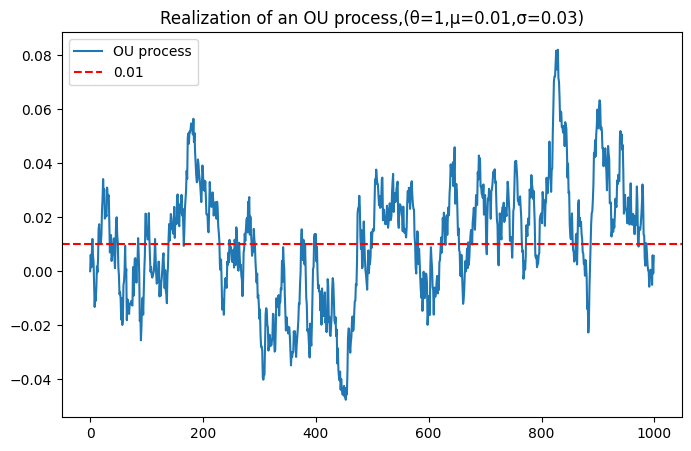

In [ ]:
theta_true = 1
mu_true = 0.01
sigma_true = 0.03
dt = 1/24

noise = generate_OU(theta_true, mu_true, sigma_true, dt)
plot_series([noise], ["OU process"],
            title=f'Realization of an OU process,'
              +f'(θ={theta_true:.3g},'
              +f'μ={mu_true:.3g},'
              +f'σ={sigma_true:.3g})',
            mean=mu_true)

### Estimating OU Parameters

Now, we try to estimate the reversion speed from the time series data. This is done using linear regression as outlined in the Background section.

In [ ]:
def do_OLS(X, Y):
  cov_mat = np.cov(X,Y)/np.var(X)
  beta = cov_mat[0][1]/cov_mat[0][0]
  alpha = np.mean(Y) - beta * np.mean(X)

  MSR = np.var(Y - alpha - beta * X) # mean of squared residual, assume mean of residual is zero

  return [alpha, beta, MSR]

In [ ]:
def get_OU_params(Zt, dt):
  OLS_params =  do_OLS(Zt[:-1], Zt[1:])
  alpha = OLS_params[0]
  beta = OLS_params[1]
  MSR = OLS_params[2]

  mu = alpha/(1-beta)

  if beta <= 0:
    print("Warn: Beta is negative, theta is set to zero manually.")
    theta = 0
  else:
    theta = -np.log(beta) / dt

  sigma = np.sqrt(2 * theta / (1 - beta**2) * MSR)

  return [theta, mu, sigma]

In [ ]:
theta_pred, mu_pred, sigma_pred = get_OU_params(noise, dt)

print(f"Predicted θ:  {theta_pred:.3g}")
print(f"Actual θ:     {theta_true:.3g}")
print(f"Predicted μ:  {mu_pred:.3g}")
print(f"Actual μ:     {mu_true:.3g}")
print(f"Predicted σ:  {sigma_pred:.3g}")
print(f"Actual σ:     {sigma_true:.3g}")

Predicted θ:  0.917
Actual θ:     1
Predicted μ:  0.0114
Actual μ:     0.01
Predicted σ:  0.0297
Actual σ:     0.03


### Goodness of Fit with ACF Plot

Lastly, we check that the ACF plot is indeed an exponential decay.

In [ ]:
def show_ACF(Zt, gamma_pred=None, gamma_true=None, lags=10):
  statsmodels.graphics.tsaplots.plot_acf(Zt, lags=lags)

  # plot theoretical ACF
  k = np.arange(lags+1)

  if not gamma_pred is None:
    decay = np.exp(-gamma_pred * k)  # ACF is 1 when k=0
    plt.plot(k, decay, label=f'Using predicted speed', color='red', linestyle='--')

  if not gamma_true is None:
    decay = np.exp(-gamma_true * k)
    plt.plot(k, decay, label=f'Using actual speed', color='blue', linestyle='--')

  plt.legend()
  plt.title(f'ACF of Time Series (First {lags} Lags)')
  plt.show()

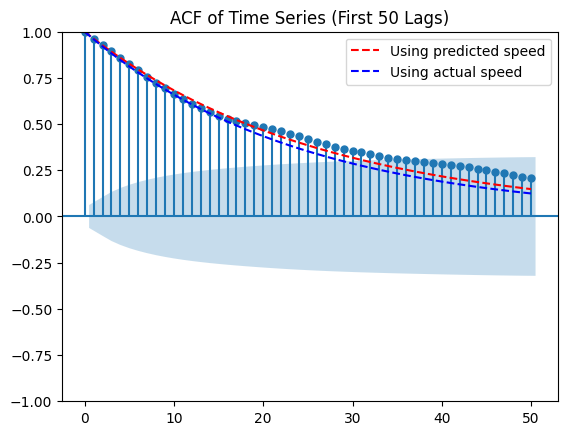

In [ ]:
show_ACF(noise,
         gamma_pred=theta_pred*dt,
         gamma_true=theta_true*dt,
         lags=50)

The blue shaded region is a default 95\% confidence interval used by `statsmodels`. If the autocorrelation value is within the blue region, it is considered not significant. The autocorrelation at that lag may just be due to chance rather than from any meaningful pattern present in the data.

## Simulating Cointegrated Pair

### Simulating Random Walk and Spread

Here, we provide a function to generate a pair of cointegrated time series, $(X_t, Y_t)$, that satisfies the following relationship
$$
Y_t = \kappa X_t + \mu + \sigma z_t .
$$

First, we model $X_t$ as a random walk with drift. This a commonly used assumption since $X_t$ is the log price, and most notably the same assumption has been applied successfully to the Black-Scholes model. Then, we assume that the $Z_t \equiv Y_t - \kappa X_t$ is an OU process with parameters $(\theta, \mu, \sigma)$. Recall that $Z_t$ is a continuous process, and we need to discretize it into an AR(1) process. With $X_t$ and $Z_t$, we get $Y_t$ by the definition.

The function below accepts a couple of parameters and generates the two series $X_t$ and $Y_t$. The result will be returned as a list of two arrays, $[X_t, Y_t]$.

In [ ]:
def generate_cointegrated(kappa,         # cointegration coefficient
                          OU_params,     # [θ,μ,σ]
                          dt,            # time step
                          X0=2,          # initial price of X
                          drift=0,       # drift of random walk (for X) (μ-0.5σ^2, μ and σ are GBM parameters, not OU parameters)
                          volat=1,       # volatility of random walk (for X) (σ)
                          observations=1000):
  theta, mu, sigma = OU_params[:3]

  dw = np.sqrt(dt) * np.random.randn(observations)
  Xt = X0 + np.cumsum(drift * dt + volat * dw) # random walk with drift for first series
  Zt = generate_OU(theta, mu, sigma, dt, observations=observations)
  Yt = kappa * Xt + Zt

  return [Xt, Yt]

In [ ]:
kappa_true = 0.9
theta_true = 1
mu_true = 0.01
sigma_true = 0.03
OU_params = [theta_true, mu_true, sigma_true]
dt = 1/24

Xt, Yt = generate_cointegrated(kappa_true, OU_params, dt,
                               X0=2, drift=0.004, volat=0.05)

We plot the two time series and observe whether there is cointegration visually.

In [ ]:
def plot_two_series(Xt, Yt):
  plot_series([Xt, Yt], [r'$X_t$', r'$Y_t$'], title="Plot of Time Series Pair")

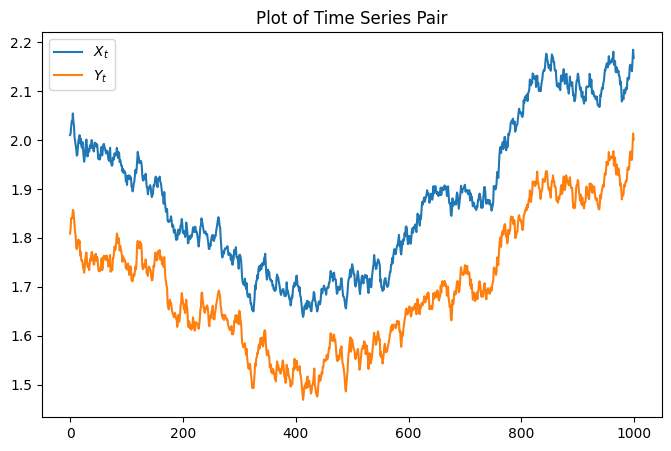

In [ ]:
plot_two_series(Xt, Yt)

Since the time series are supposed to represent log prices, extreme values will be amplified via the exponential function. Thus, to ensure realistic simulations, we can try to keep the numbers between $e^{0} = 1$ and $e^6 = 403.4$

### Engle-Granger Test for Cointegration

We create a function to verify that the series are indeed cointegrated. The `statsmodels` library provides the `coint` function for the [Engle-Granger test](https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.coint.html).

In [ ]:
def print_bold(s):
  print('\033[1m' + s + '\033[0m')

In [ ]:
def test_cointegration(Xt, Yt, name=None):
  result = sm.tsa.coint(Xt, Yt)
  c_stat, p_value, crit_values = result

  title = "Engle-Granger Test for cointegration"
  if not name is None:
    title += f" for {name}"

  print("------------------------------------------------------------------")
  print_bold(title)
  print()
  print(f"Cointegration test statistic: {c_stat:.3g}")
  print(f"Critical values:")
  for percent, crit in zip([1,5,10], crit_values): # crit_values is a list
    print(f"\t\t\t{percent}%: {crit:.3g}")
  print(f"P-value:                      {p_value:.3g}")

  print()
  if p_value < 0.05:
      print("The series are likely cointegrated (reject the null hypothesis).")
  else:
      print("The series are likely non-cointegrated (fail to reject the null hypothesis).")
  print("------------------------------------------------------------------")

In [ ]:
test_cointegration(Xt, Yt)

------------------------------------------------------------------
Engle-Granger Test for cointegration

Cointegration test statistic: -4.47
Critical values:
			1%: -3.91
			5%: -3.34
			10%: -3.05
P-value:                      0.00137

The series are likely cointegrated (reject the null hypothesis).
------------------------------------------------------------------


## Estimating Cointegration Coefficient


### OLS Between $X_t$ and $Y_t$

We run a linear regression to determine the cointegration coefficient.

In [ ]:
mu_pred, kappa_pred, _ = do_OLS(Xt, Yt)

print(f"Predicted μ:  {mu_pred:.3g}")
print(f"Actual μ:     {mu_true:.3g}")
print(f"Predicted κ:  {kappa_pred:.3g}")
print(f"Actual κ:     {kappa_true:.3g}")

Predicted μ:  0.108
Actual μ:     0.01
Predicted κ:  0.847
Actual κ:     0.9


### Sensitivity to Length of Data

The above results are consistent with the initial $\kappa$ that we have chosen above. The estimate of $\mu$ is less reliable, but it is okay as we do not use it directly. We study how the length of the data affects the prediction accuracy. This is important as our predictions should not be sensitive to the length of the data given (assuming we have sufficient data). We do this by repeatedly feeding truncated versions of the time series into the OLS regression. This is just a one-time exercise and will not be used in subsequent parts of the notebook.

In [ ]:
def test_OLS_accuracy(Xt, Yt, start, kappa_true, mu_true):
  mu_estimates = []
  kappa_estimates = []

  for T in range(start, len(Xt)):
    Xt_truncated = Xt[:T]
    Yt_truncated = Yt[:T]
    params = do_OLS(Xt_truncated, Yt_truncated)
    mu = params[0]
    kappa = params[1]

    mu_estimates.append(mu)
    kappa_estimates.append(kappa)

  fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6))

  ax1.plot(range(start, len(Xt)), kappa_estimates, label="Estimated κ")
  ax1.axhline(y=kappa_true,
              color='r',
              linestyle='--',
              label=f"True κ ({kappa_true:.3f})")
  ax1.set_title("Estimated κ vs Length of Time Series")
  ax1.set_xlabel("Length of Time Series Used")
  ax1.set_ylabel("Estimated κ")
  ax1.legend()
  ax1.grid(True)

  ax2.plot(range(start, len(Xt)), mu_estimates, label="Estimated μ")
  ax2.axhline(y=mu_true,
              color='r',
              linestyle='--',
              label=f"True μ ({mu_true:.3f})")
  ax2.set_title("Estimated μ vs Length of Time Series")
  ax2.set_xlabel("Length of Time Series Used")
  ax2.set_ylabel("Estimated μ")
  ax2.legend()
  ax2.grid(True)

  plt.tight_layout()
  plt.show()

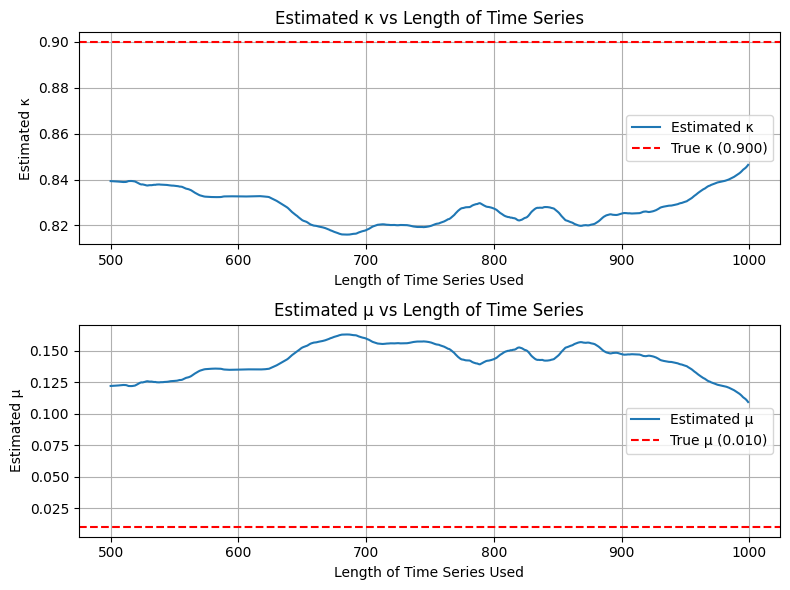

In [ ]:
test_OLS_accuracy(Xt, Yt, len(Xt)//2, kappa_true, mu_true)

## Spread Variable

With the cointegration coefficient found, we are ready to define the spread variable, which is presumed to be stationary. What we will be monitoring is a linear combination of $X$ and $Y$, governed by the equation
$$
Z_t = Y_t - \kappa X_t = \mu + \sigma z_t
$$

Note that later we will define $X_t$ and $Y_t$ to be the log of stock prices, so $Z_t$ does not have the straightforward interpretation as the total portfolio value.

In [ ]:
def get_spread(Xt, Yt, kappa_overwrite=None):

  if not kappa_overwrite is None:
    kappa = kappa_overwrite # manual overwrite, for debugging purpose
  else:
    kappa = do_OLS(Xt, Yt)[1]

  return (Yt - kappa * Xt, kappa)

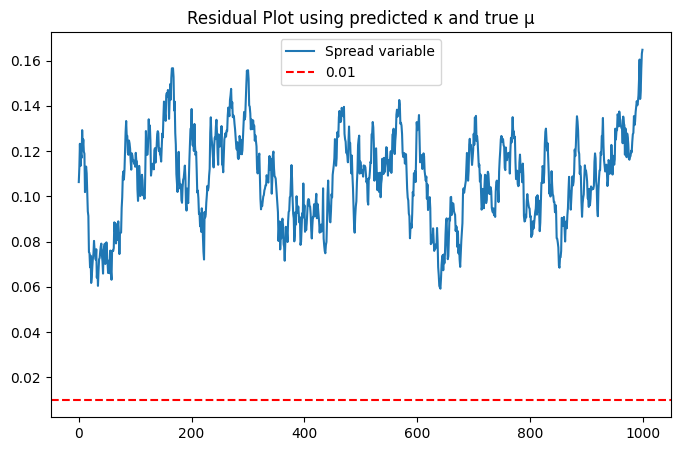

Predicted κ: 0.847
Actual κ:    0.9


In [ ]:
Zt, kappa_pred = get_spread(Xt, Yt)
plot_series([Zt], ["Spread variable"],
            title="Residual Plot using predicted κ and true μ", mean=mu_true)

print(f"Predicted κ: {kappa_pred:.3g}")
print(f"Actual κ:    {kappa_true:.3g}")

If the residual is obviously not hovering around $\mu$, it means that we have predicted $\kappa$ poorly. As a comparison, the plot below shows the correctly constructed spread.

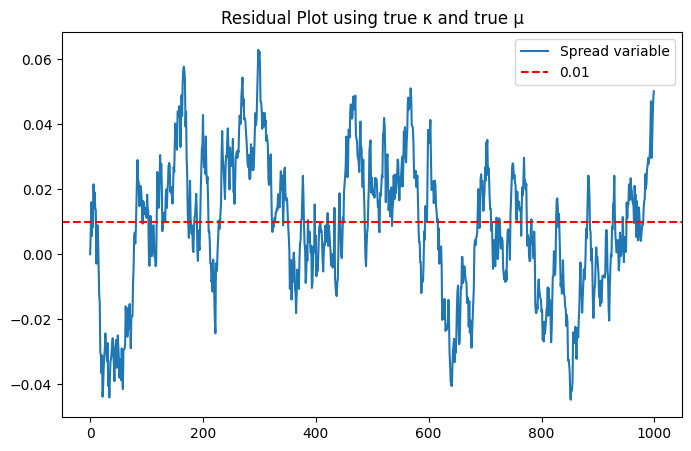

In [ ]:
Zt_true, kappa_pred = get_spread(Xt, Yt, kappa_overwrite=kappa_true)
plot_series([Zt_true], ["Spread variable"],
            title="Residual Plot using true κ and true μ", mean=mu_true)

### Estimating the OU Parameters from the Spread

Next, we estimate the mean reversion parameters of the spread variable. Does it agree well with the chosen values of $\theta$, $\mu$ and $\sigma$? Note that that this is the second estimate of $\mu$, the first estimate was when fitting $Y_t = \kappa X_t + \mu$.

In [ ]:
theta_pred, mu_pred, sigma_pred = get_OU_params(Zt, dt)

print(f"Predicted θ:  {theta_pred:.3g}")
print(f"Actual θ:     {theta_true:.3g}")
print(f"Predicted μ:  {mu_pred:.3g}")
print(f"Actual μ:     {mu_true:.3g}")
print(f"Predicted σ:  {sigma_pred:.3g}")
print(f"Actual σ:     {sigma_true:.3g}")

Predicted θ:  1.06
Actual θ:     1
Predicted μ:  0.109
Actual μ:     0.01
Predicted σ:  0.0297
Actual σ:     0.03


The predicted parameters are in line with their actual values. Even though $\mu$ may deviate from the actual value, it is a snowball effect of failing to predict $\kappa$ perfectly. We can understand it from the plot below, and comparing it with the above plots.

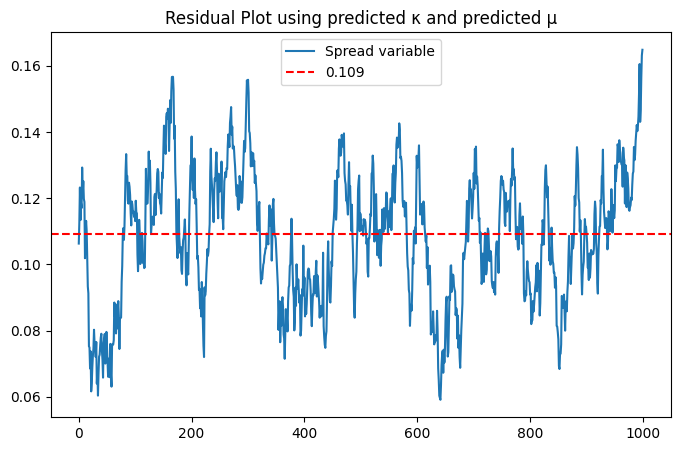

In [ ]:
plot_series([Zt], ["Spread variable"],
            title="Residual Plot using predicted κ and predicted μ", mean=mu_pred)

The lesson here is that as long as we stick to using both predicted $\kappa$ and $\mu$, we should be getting consistent results. So it is okay even if the predicted $\mu$ differs from the actual $\mu$.

### ACF Plot

Here, we compare our time series with the theoretical exponential decay to check that our predictions are consistent with the OU model.

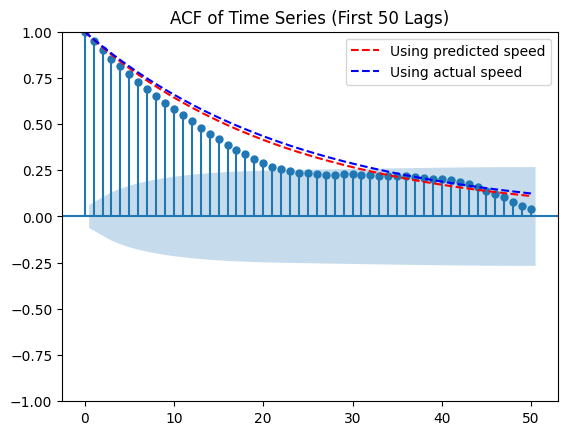

In [ ]:
show_ACF(Zt,
         gamma_pred=theta_pred*dt,
         gamma_true=theta_true*dt,
         lags=50)

The ACF fits reasonably well to the exponential function constructed with the predicted speed.

## Sensitivity to Granularity

It is useful to package all of the procedures above into a single function, since we will be using them ofen.

In [ ]:
def get_params_from_pair(Xt, Yt, dt, kappa_overwrite=None, verbose=0):
  # Different level of verbose meaning:
  # 0: No printing, only final return
  # 1: print test statistics
  # 2: plot graphs

  # visualize the two time series
  if verbose>=2:
    plot_two_series(Xt, Yt)

  if verbose>=1:
    # Engle-Granger test
    test_cointegration(Xt, Yt)

  # Define spread variable using OLS
  Zt, kappa_pred = get_spread(Xt, Yt, kappa_overwrite=kappa_overwrite)

  if verbose>=2:
    # Plot spread variable
    plot_series([Zt], ["Spread"], title="Residual Plot", mean=0)

  # Fitting to an OU process
  OU_params = get_OU_params(Zt, dt)

  if verbose>=2:
    # Plot ACF of spread variable
    show_ACF(Zt, gamma_pred=OU_params[0]*dt, lags=50)

  return [kappa_pred] + OU_params


As a quick check, we can repeat the same calculations as above, but with lower granularity (i.e. we discard every other data point in the time series). As expected, the estimation is still accurate since we have a long enough time series.

In [ ]:
params = get_params_from_pair(Xt[::2], Yt[::2], 2*dt, verbose=0)

print(f"Predicted κ: {params[0]:.3g}")
print(f"Actual κ:    {kappa_true:.3g}")
print(f"Predicted θ: {params[1]:.3g}")
print(f"Actual θ:    {theta_true:.3g}")
print(f"Predicted μ: {params[2]:.3g}")
print(f"Actual μ:    {mu_true:.3g}")
print(f"Predicted σ: {params[3]:.3g}")
print(f"Actual σ:    {sigma_true:.3g}")

Predicted κ: 0.845
Actual κ:    0.9
Predicted θ: 1.09
Actual θ:    1
Predicted μ: 0.112
Actual μ:    0.01
Predicted σ: 0.0302
Actual σ:    0.03


## Repeated Testing

In the previous sections, we only ran the methodology once, and the good/bad results might just be pure luck. Here, we take a Monte Carlo approach and repeatedly estimate the same parameters $(\kappa, \theta, \mu, \sigma, \Delta t)$ by simulating different realizations of the time series corresponding to the same parameters for 10000 times. This allows identifying any flaws in our methodology by looking for systematic errors in the predictions.

In [ ]:
def estimate_simulated(kappa, OU_params, dt, observations=1000):
  Xt, Yt = generate_cointegrated(kappa, OU_params, dt,
                                 X0=2, drift=0.004, volat=0.05, observations=observations)
  params = get_params_from_pair(Xt, Yt, dt, verbose=0)
  return params

In [ ]:
def repeated_simulations(kappa, OU_params,
                         dt, observations=1000, repeats=100):
  params_pred = []

  for _ in range(repeats):
    params_pred.append(estimate_simulated(kappa, OU_params, dt))

  return np.array(params_pred).T # 2D numpy array

In [ ]:
def plot_repeated_predictions(params_true, params_pred):
  param_names = ["κ", "θ", "μ", "σ"]
  fig, axs = plt.subplots(2, 2, figsize=(8, 8))
  axs = axs.flatten()  # Flatten 2D array to 1D for easy indexing

  for i, predictions in enumerate(params_pred):
    # Calculate bins using Sturges' formula
    std_dev = np.std(predictions)
    n_bins = int(np.ceil(np.log2(len(predictions)) + 1))
    bin_width = 2 * std_dev / n_bins
    bins = np.arange(min(predictions), max(predictions) + bin_width, bin_width)

    # Plot histogram
    axs[i].hist(predictions,
                bins=bins,
                color='blue',
                alpha=0.7,
                edgecolor='black')
    axs[i].axvline(x=params_true[i],
                   color='red',
                   linestyle='dashed',
                   linewidth=1,
                   label='True value')
    axs[i].set_title(f"Distribution of predictions for {param_names[i]}")
    axs[i].set_xlabel('Predicted Value')
    axs[i].set_ylabel('Frequency')
    axs[i].legend()
    axs[i].grid(True)

  plt.tight_layout()
  plt.show()

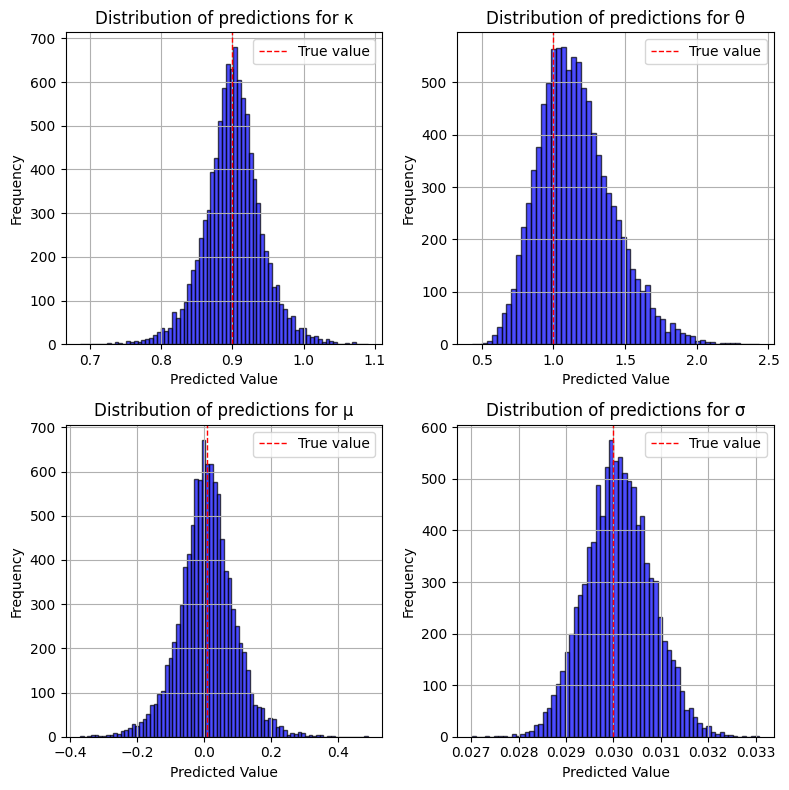

CPU times: user 42.5 s, sys: 888 ms, total: 43.4 s
Wall time: 48.7 s


In [ ]:
%%time

params_pred = repeated_simulations(kappa_true, OU_params,
                                   dt, observations=1000, repeats=10000)

plot_repeated_predictions([kappa_true] + OU_params,
                          params_pred)

From the histograms, we see that all our parameter estimates are unbiased except for $\theta$, the simple reason being that $\langle e^\theta \rangle \neq e^{\langle \theta \rangle}$. However, we also observe that the error margin is also somewhat wide. For the mean reversion strategy to work well, we must have a good estimate of $\mu$. Thus, we want to trade a spread with low $\mu$, high $\sigma$, and high $\theta$. It will be good to have a secondary estimate of the parameters using an independent method, and observe if there are any discrepancies.

## Trading Rules

Here, we will practice our strategy using simulated data. As a recap, we are monitoring the spread, defined as
$$
Z_t = Y_t - \kappa X_t
$$

where $Y_t$ and $X_t$ are the log prices of two stocks at time $t$. We set the trading threshold of $\pm \sigma$ to enter a (pair of) trade. Concretely, if $Z_t$ crosses $\sigma$ from below, $Y$ is overvalued and $X$ is undervalued. We will be long the spread, meaning to buy $N_Y$ amount of stock $Y$ and $N_X$ amount of stock $X$, where
$$
N_X = e^{-X_t} \\
N_Y = -e^{-Y_t}
$$

so that we are overall market neutral (since $N_X e^{X_t} + N_Y e^{Y_t} = 0$). If we are only concerned with the percentage profit of the strategy, the actual quantity of stock traded does not matter since our cost scales with the quantity linearly. Of course, this is not the case in the real world. Thus, for simplicity, we will enter a new trade with $\$1$ on each leg every time. Assuming a $0.5\%$ cost, the total cost for the trade above is then
$$
(0.5\%) (|N_X| e^{X_t} + |N_Y| e^{Y_t}) = \$ 0.01
$$

The next point of interest is when the price returns to the mean level. We will then unwind our position completely. Again, there will be a 0.05\% cost involved. For our simple strategy, we note that the trades occur sequentially, meaning that the previous trade is always unwound before the next one happens. This is a good thing as we only need $\mathcal{O}(1)$ memory requirement to implement the strategy. Lastly, we include a time-based stop loss of 5 half-lives.

### Generating Signals

Given the time series for the prices of X and Y, we first need to estimate the cointegration coefficient and the OU parameters. We will only use the first 1000 data points for the estimation, and the subsequent data points will be used for evaluation/backtesting.

In [ ]:
# same parameters as in section "Simulating Cointegrated Pair"
kappa_true = 0.9
theta_true = 1
mu_true = 0.01
sigma_true = 0.03
OU_params = [theta_true, mu_true, sigma_true]
dt = 1/24

# log prices
Xt, Yt = generate_cointegrated(kappa_true, OU_params, dt,
                               X0=2, drift=0.004, volat=0.05, observations=2000)

Xt_train = Xt[:1000]
Yt_train = Yt[:1000]
Xt_test = Xt[1000:]
Yt_test = Yt[1000:]

Zt_train, kappa_pred = get_spread(Xt_train, Yt_train)
print(f"Predicted κ:  {kappa_pred:.3g}")

OU_params_train = get_OU_params(Zt_train, dt)
print(f"Predicted θ:  {OU_params_train[0]:.3g}")
print(f"Predicted μ:  {OU_params_train[1]:.3g}")
print(f"Predicted σ:  {OU_params_train[2]:.3g}")

Zt_test, _ = get_spread(Xt_test, Yt_test, kappa_overwrite=kappa_pred)

Predicted κ:  0.945
Predicted θ:  1.36
Predicted μ:  -0.0755
Predicted σ:  0.0295


We write function that generates the buy and sell signals, given the two log-price series.

In [ ]:
def generate_signals(Zt, OU_params, dt, thresh=1, halflives=5):
  # Zt is the spread, assumed to be mean-reverting.
  # thresh is the number of sigma above or below the mean to enter a trade

  # Signals are recorded as a list of tuples
  # E.g. (300, "BUY") means to be long the spread at the 300th time step
  # This occurs after analyzing the prices at the 298th and 299th time step
  # Possible actions are "BUY", "SELL", "UNWIND"
  # "BUY" and "SELL" refers to the position on the spread, not the stocks
  # Since overall market neutral, the overall payment is the 0.5% cost
  # "UNWIND" will just reset position to zero, with 0.5% cost.
  # computation of cost is done in another function

  signals = []
  theta, mu, sigma = OU_params[:3]

  lower_thresh = mu - thresh*sigma
  upper_thresh = mu + thresh*sigma

  pos = 0 # either 0, +1, -1
  counter = 0

  if halflives is None:
    maxhold = np.inf
  else:
    maxhold = int(halflives * np.log(2) / theta / dt)
    print(f"Stop loss: {maxhold} periods")

  for k in range(1,len(Zt)):
    if pos==0:
      if Zt[k]<=lower_thresh and Zt[k-1]>lower_thresh:
        signals.append((k+1, "BUY"))
        pos = 1
      elif Zt[k]>=upper_thresh and Zt[k-1]<upper_thresh:
        signals.append((k+1, "SELL"))
        pos = -1

    elif pos==1: # long the spread
      if Zt[k]>=mu and Zt[k-1]<mu:
        signals.append((k+1, "UNWIND"))
        pos = 0
        counter = 0
      else:
        counter+=1

    elif pos==-1: # short the spread
      if Zt[k]<=mu and Zt[k-1]>mu:
        signals.append((k+1, "UNWIND"))
        pos = 0
        counter = 0
      else:
        counter+=1

    if counter > maxhold:
      signals.append((k+1, "UNWIND"))
      pos = 0
      counter = 0

  if len(signals)>0 and signals[-1][0] == len(Zt):
    # no price data to calculate returns, so drop the last signal
    signals = signals[:-1]

  return signals

In [ ]:
signals = generate_signals(Zt_test, OU_params_train, dt, thresh=1)

Stop loss: 61 periods


We expect that only every other signal should be "UNWIND". Let's confirm that it is indeed the case.

In [ ]:
def check_unwind(signals):
  for j in range(len(signals)):
    if j%2==0:
      if signals[j][1] == "UNWIND":
        print(f"Error: Found UNWIND at step {j}")
    else:
      if signals[j][1] != "UNWIND":
        print(f"Error: Found {signals[j][1]} at step {j}")

  print("End of check. If there are no other messages, all is good!")

In [ ]:
check_unwind(signals)

End of check. If there are no other messages, all is good!


Let's visualize the signals with a plot.

In [ ]:
def plot_price_series_with_signals(Zt, signals, y_hints=None):
    fig, ax = plt.subplots(figsize=(8, 5))

    ax.plot(Zt, label='Spread', color='blue')

    # Extract time points
    long_signals = []
    short_signals = []

    for j in range(len(signals)):
      time_now = signals[j][0]
      action_now = signals[j][1]
      action_prev = signals[j-1][1]

      if action_now == "BUY":
        long_signals.append(time_now)
      elif action_now == "SELL":
        short_signals.append(time_now)
      # j=0 should not reach this point, better put a check?
      # we never have "UNWIND" as the first signal
      elif action_now == "UNWIND":
        if action_prev == "BUY":
          short_signals.append(time_now)
        elif action_prev == "SELL":
          long_signals.append(time_now)
        else:
          print(f"Error, no position to unwind at step {j}")
          break
      else:
        print(f"Error, unknown action {action_now} at step {j}")
        break

    # Plot the "BUY" signals (Long Y, Short X)
    for k in long_signals:
      # Plotting one point at a time will clutter the legend
      # Need to do something about it later
      ax.plot(k, Zt[k], '^', markersize=3, color='green', label='Long')

    # Plot the "SELL" signals (Short Y, Long X)
    for k in short_signals:
      ax.plot(k, Zt[k], 'v', markersize=3, color='red', label='Short')

    if not y_hints is None:
      lo, mid, hi = y_hints
      plt.axhline(y=mid, color='r', linestyle='--',
                  label=f"{mid:.3g}")
      ax.set_ylim(lo, hi)

    ax.set_title('Spread Series with Trading Signals')
    ax.set_xlabel('Time')
    ax.set_ylabel('Spread')

    # Add legend (handle duplicates labels)
    handles, labels = ax.get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    ax.legend(by_label.values(), by_label.keys())

    plt.show()

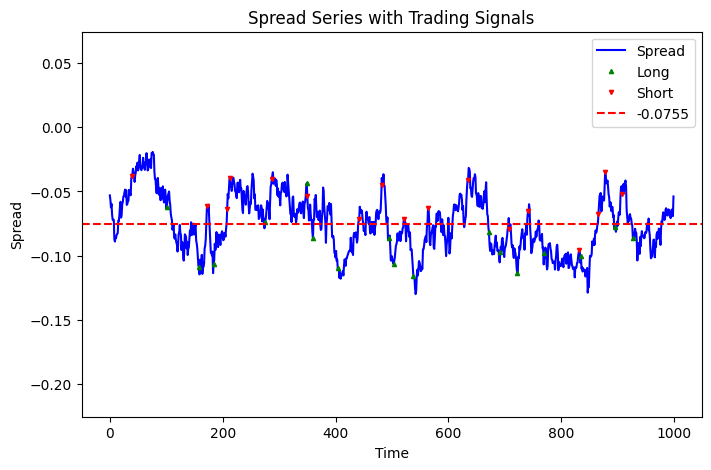

In [ ]:
mu_pred = OU_params_train[1]

lo = mu_pred - 5*sigma_true
mid = mu_pred
hi = mu_pred + 5*sigma_true
plot_price_series_with_signals(Zt_test, signals,
                               y_hints=[lo,mid,hi])

From the plot above, we see that it is quite important to be able to accurately predict the average level $\mu$. In other words, the error in predicting $\mu$ should be small compared to the fluctuations determined by $\sigma$.

All this while, we have fitted a time series to a single OU process, and any deviation from the predicted trend is attributed to the stochastic nature of the process. However, in real life, there may be compelling reasons to believe that the underlying parameters may change abruptly (e.g. onset of war, change in leadership) or gradually (e.g. slow changes in interest rates). Our simulations have been smooth sailing so far, but this point is something to be mindful of when working with real-world data.

### Portfolio Visualization

We visualize how our holdings change over time. Our convention is that `position[i+1]` is determined after the information for `price[i]` is available. We start with `position[0]=0`. This means that the `position` array has the same length as the `price` array. The `cost` array keeps track of the cumulative trading cost incurred up to and including the present moment, so it has the same length as `price`.

In [ ]:
def pos_from_signal(price_X, price_Y, signals, cost=0.005):
  # First, calculate position/weights at each point in time from signals
  # Calculate PnL by weight * (price change)

  pos_X = np.zeros(len(price_X))
  pos_Y = np.zeros(len(price_X))
  costs = np.zeros(len(price_X))

  for j in range(len(signals)):
    time_now, action_now = signals[j] # e.g. (300, "BUY")
    if j < len(signals)-1:
      time_next = signals[j+1][0]
    else:
      time_next = len(price_X)

    Nx = 1/price_X[time_now]
    Ny = 1/price_Y[time_now]

    # print(f"encountered {action}, setting position from {time_now} to {time_next}")

    if action_now == "BUY":
      pos_X[time_now:time_next] = -Nx
      pos_Y[time_now:time_next] = Ny
      costs[time_now] = 2*cost
    elif action_now == "SELL":
      pos_X[time_now:time_next] = Nx
      pos_Y[time_now:time_next] = -Ny
      costs[time_now] = 2*cost
    elif action_now == "UNWIND":
      pos_X[time_now:time_next] = 0
      pos_Y[time_now:time_next] = 0
      costs[time_now] = ( # previous position times price now
          abs(pos_X[time_now-1]) * price_X[time_now]
        + abs(pos_Y[time_now-1]) * price_Y[time_now]
          ) * cost
    else:
      print(f"Error, unknown action {action_now} at step {j}")
      break

  return pos_X, pos_Y, costs

In [ ]:
price_X = np.exp(Xt_test)
price_Y = np.exp(Yt_test)

pos_X, pos_Y, costs = pos_from_signal(price_X, price_Y, signals)

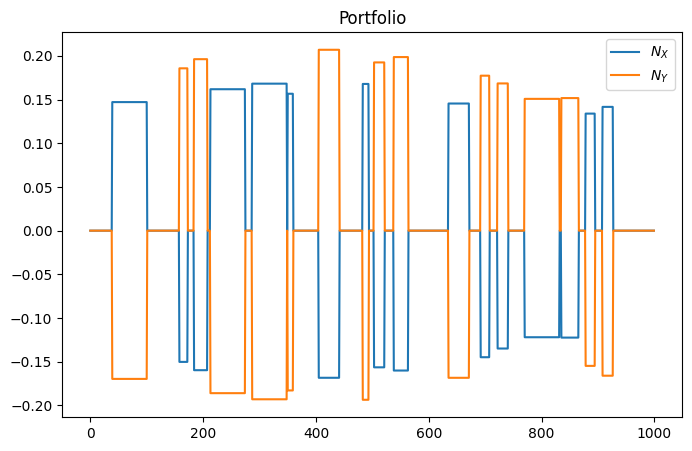

In [ ]:
plot_series([pos_X, pos_Y],
 [r'$N_X$', r'$N_Y$'],
 title="Portfolio")

We can clearly see the long-short pattern in our trades. To have some context of the plot above, we also provide the price of $X$ and $Y$.

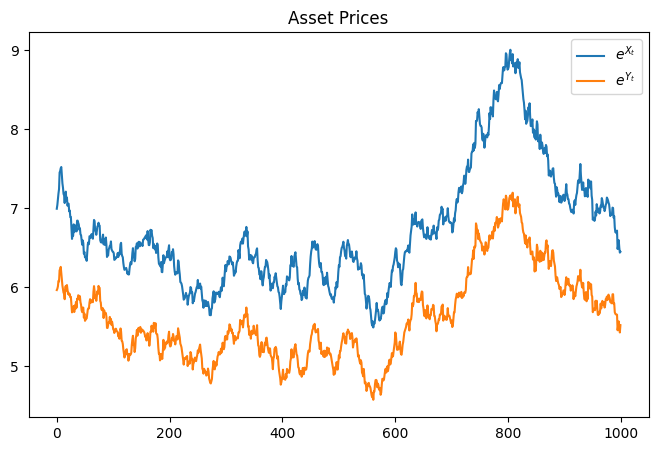

In [ ]:
plot_series([price_X, price_Y],
 [r'$e^{X_t}$', r'$e^{Y_t}$'],
 title="Asset Prices")

## Returns Analysis

### Comparing with Buy-and-Hold

Here, we will analyze the returns of our strategy after accounting trading costs. If e.g. $\Delta t = 1$, the returns for one day is calculated as

> `returns[i]` = (`price[i+1]` - `price[i]`) $\times$ `position[i+1]`


In [ ]:
def calculate_returns_MR(price_X, price_Y, pos_X, pos_Y, costs):
  return (
        pos_X[1:] * np.diff(price_X)
      + pos_Y[1:] * np.diff(price_Y)
      - costs[1:]
  )

In [ ]:
returns_MR = calculate_returns_MR(price_X, price_Y, pos_X, pos_Y, costs)
price_MR = np.cumsum(returns_MR)

We compare our mean reversion strategy to the benchmark buy-and-hold strategy.

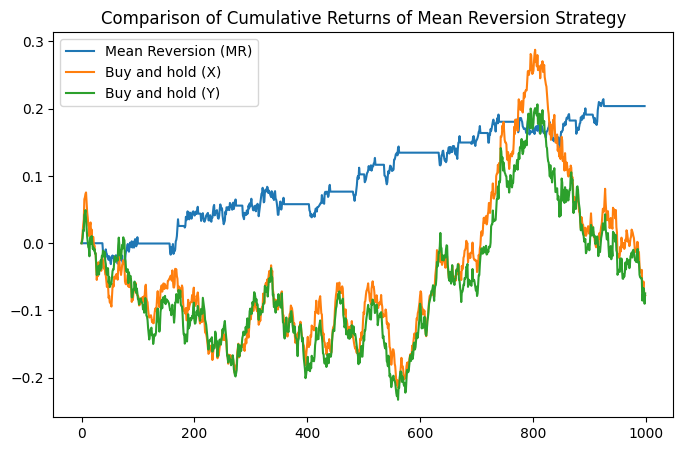

In [ ]:
price_X_normalized = price_X/price_X[0]-1
price_Y_normalized = price_Y/price_Y[0]-1

plot_series([price_MR, price_X_normalized, price_Y_normalized],
 ['Mean Reversion (MR)', 'Buy and hold (X)', 'Buy and hold (Y)'],
 title="Comparison of Cumulative Returns of Mean Reversion Strategy")

### Strategy Metrics

We look at how the mean reversion (MR) strategy fares in terms of each of the metrics. We should bear in mind that the returns for X and Y are controlled by the `drift` parameter that we chose.

**Annualized Returns**

E.g., $0.1$ below means a $10\%$ annualized returns.

In [ ]:
# price can be thought of as the cumulative dollar returns
# we assume starting capital is 1 dollar
# simple not compounded returns
def annualized_return(price, dt=1):
  total_return = price[-1] - price[0]

  return total_return * (252 / (dt * (len(price)-1)))

In [ ]:
print(f"Annualized return for X:  {annualized_return(price_X_normalized, dt=dt):.3g}")
print(f"Annualized return for Y:  {annualized_return(price_Y_normalized, dt=dt):.3g}")
print(f"Annualized return for MR: {annualized_return(price_MR, dt=dt):.3g}")

Annualized return for X:  -0.471
Annualized return for Y:  -0.451
Annualized return for MR: 1.24


**Annualized Sharpe Ratio**

In [ ]:
def sharpe_ratio(returns, risk_free=0, dt=1):
  # risk_free is the (annualized) risk free rate

  periods = 252/dt
  excess_returns = np.mean(returns)*periods - risk_free
  volat = np.std(returns, ddof=1) * np.sqrt(periods)

  return excess_returns / volat

In [ ]:
returns_X = np.diff(price_X)
returns_Y = np.diff(price_Y)

print(f"Sharpe ratio for X:  {sharpe_ratio(returns_X, dt=dt):.3g}")
print(f"Sharpe ratio for Y:  {sharpe_ratio(returns_Y, dt=dt):.3g}")
print(f"Sharpe ratio for MR: {sharpe_ratio(returns_MR, dt=dt):.3g}")

Sharpe ratio for X:  -0.606
Sharpe ratio for Y:  -0.544
Sharpe ratio for MR: 3.45


**Annualized Sortino Ratio**

In [ ]:
def sortino_ratio(returns, risk_free=0, dt=1):
  # risk_free is the (annualized) risk free rate

  periods = 252/dt
  excess_returns = np.mean(returns)*periods - risk_free

  downside_returns = returns[returns < 0]
  volat = np.std(downside_returns, ddof=1) * np.sqrt(periods)

  return excess_returns / volat

In [ ]:
print(f"Sortino ratio for X:  {sortino_ratio(returns_X, dt=dt):.3g}")
print(f"Sortino ratio for Y:  {sortino_ratio(returns_Y, dt=dt):.3g}")
print(f"Sortino ratio for MR: {sortino_ratio(returns_MR, dt=dt):.3g}")

Sortino ratio for X:  -0.957
Sortino ratio for Y:  -0.858
Sortino ratio for MR: 4


**Max Drawdown**

E.g., $-0.1$ means a $10\%$ drawdown from the peak price.

In [ ]:
def max_drawdown(price):
  peak = np.maximum.accumulate(price)
  drawdown = price - peak
  return np.min(drawdown)

In [ ]:
print(f"Max drawdown for X:  {max_drawdown(price_X_normalized):.3g}")
print(f"Max drawdown for Y:  {max_drawdown(price_Y_normalized):.3g}")
print(f"Max drawdown for MR: {max_drawdown(price_MR):.3g}")

Max drawdown for X:  -0.367
Max drawdown for Y:  -0.296
Max drawdown for MR: -0.0517


We have thus shown that the mean reversion strategy is resillient and profitable. It outperforms the buy-and-hold strategy in all four metrics. The next step would be to apply the methodology to real-world data.

# Stock Picking

Since our work is focused on U.S. equities, we will be tracking the S&P 500 index, which tracks the largest 500 companies listed on U.S. stock exchanges. We should be aware of stock splits, so it helps to look for outliers in the returns data, although we expect the adjusted close price to have addressed this.

We will use 2005-2014 as the training period, and 2014-present as the testing period. We choose the training period to include the 2008 financial crisis, and for the testing period to include the COVID-19 pandemic. First, we obtain a list of tickers for the companies in the S&P 500. To avoid survivorship bias, we should look at the composition of the S&P 500 in the year 2011. However, that is technically challenging as we do not have such a functionality in the Yahoo Finance API. Hence, we will just use the list of companies that are present in the index today. We will compare the mean reversion strategy with the prices of the same company so that the comparison would still be fair.

### Preparing the S&P 500 Tickers

In [ ]:
# Get the S&P 500 constituents from Wikipedia
url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
tables = pd.read_html(url)
sp500_table = tables[0]
sp500_tickers = sp500_table['Symbol'].tolist()

print(f"Found {len(sp500_tickers)} tickers on Wikipedia. ")

Found 503 tickers on Wikipedia. 


We will check whether each ticker is available in YFinance.

In [ ]:
# Function to check if ticker is valid
def check_tickers(tickers):
    invalid_tickers = []

    for ticker in tickers:
        try:
            if not 'symbol' in yf.Ticker(ticker).info:
                invalid_tickers.append(ticker)
        except Exception as e:
            invalid_tickers.append(ticker)

    return invalid_tickers

In [ ]:
# Takes half a minute, uncomment in final run
# invalid_tickers = check_tickers(sp500_tickers)
# print(f"Number of invalid tickers: {len(invalid_tickers)}")

## Correlation Matrix

We download the adjusted close price of these tickers for the year 2012 into a dataframe for exploratory data analysis. Our goal is to find cointegrated stocks. Some of the recent companies are not listed so long ago, so we will simply ignore the correponding columns.

In [ ]:
sp500_close = yf.download(sp500_tickers,
                          start='2012-01-01',
                          end='2012-12-31',
                          progress=False)['Adj Close']

sp500_close = sp500_close.dropna(axis=1)

ERROR:yfinance:
51 Failed downloads:
ERROR:yfinance:['CDW', 'MRNA', 'QRVO', 'ALLE', 'HPE', 'GDDY', 'KHC', 'INVH', 'FOXA', 'HWM', 'VLTO', 'FOX', 'SYF', 'DAY', 'GEHC', 'OTIS', 'ANET', 'PYPL', 'KEYS', 'PAYC', 'GEV', 'NCLH', 'ZTS', 'IR', 'ABBV', 'KVUE', 'UBER', 'DELL', 'ABNB', 'NWSA', 'CTVA', 'CARR', 'CRWD', 'CZR', 'LW', 'DOW', 'VICI', 'SOLV', 'AMTM', 'PLTR', 'CFG', 'HLT', 'FTV', 'CEG', 'VST', 'SW', 'NWS', 'CTLT', 'IQV']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2012-01-01 -> 2012-12-31) (Yahoo error = "Data doesn\'t exist for startDate = 1325394000, endDate = 1356930000")')
ERROR:yfinance:['BRK.B']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
ERROR:yfinance:['BF.B']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2012-01-01 -> 2012-12-31)')


Next, we calculate the returns, and use that to construct the correlation matrix.

In [ ]:
sp500_returns = sp500_close.pct_change()
sp500_corr = sp500_returns.corr()

We unstack the matrix to reveal the top 10 correlated pairs.

In [ ]:
unstacked_sp500 = sp500_corr.unstack() # Series
unstacked_sp500 = unstacked_sp500.to_frame(name='Correlation')
unstacked_sp500.index = unstacked_sp500.index.set_names(['Asset 1', 'Asset 2'])
unstacked_sp500 = unstacked_sp500.reset_index()

filtered_pairs = unstacked_sp500[unstacked_sp500["Asset 1"] != unstacked_sp500["Asset 2"]]
filtered_pairs = filtered_pairs.sort_values('Correlation', ascending=False)
top_10_pairs = filtered_pairs.head(2*10)
top_10_pairs = top_10_pairs[::2] # We only want one of (X,Y) and (Y,X)
top_10_pairs.reset_index(drop=True, inplace=True)

top_10_pairs

,Asset 1,Asset 2,Correlation
0,GOOGL,GOOG,1.000000
1,AVB,EQR,0.875667
2,DHI,LEN,0.863735
3,LEN,PHM,0.844009
4,EQR,CPT,0.841670
5,MS,GS,0.836422
6,NUE,STLD,0.835751
7,CPT,AVB,0.832541
8,CPT,UDR,0.831942
9,BK,NTRS,0.830182


The first row is obviously not suitable for our strategy. Let's plot the remaining nine pairs for visualization. First, we will redownload the daily data over a long period of 2004-2013, but only for the relevant tickers of interest.

In [ ]:
interesting_tickers = set(top_10_pairs['Asset 1'].tolist() + top_10_pairs['Asset 2'].tolist())
interesting_tickers -= {"GOOGL", "GOOG"}
interesting_tickers = list(interesting_tickers)

sp500_interesting = yf.download(interesting_tickers,
                                start='2004-01-01',
                                end='2013-12-31',
                                progress=False)['Adj Close']

# sp500_interesting.describe()

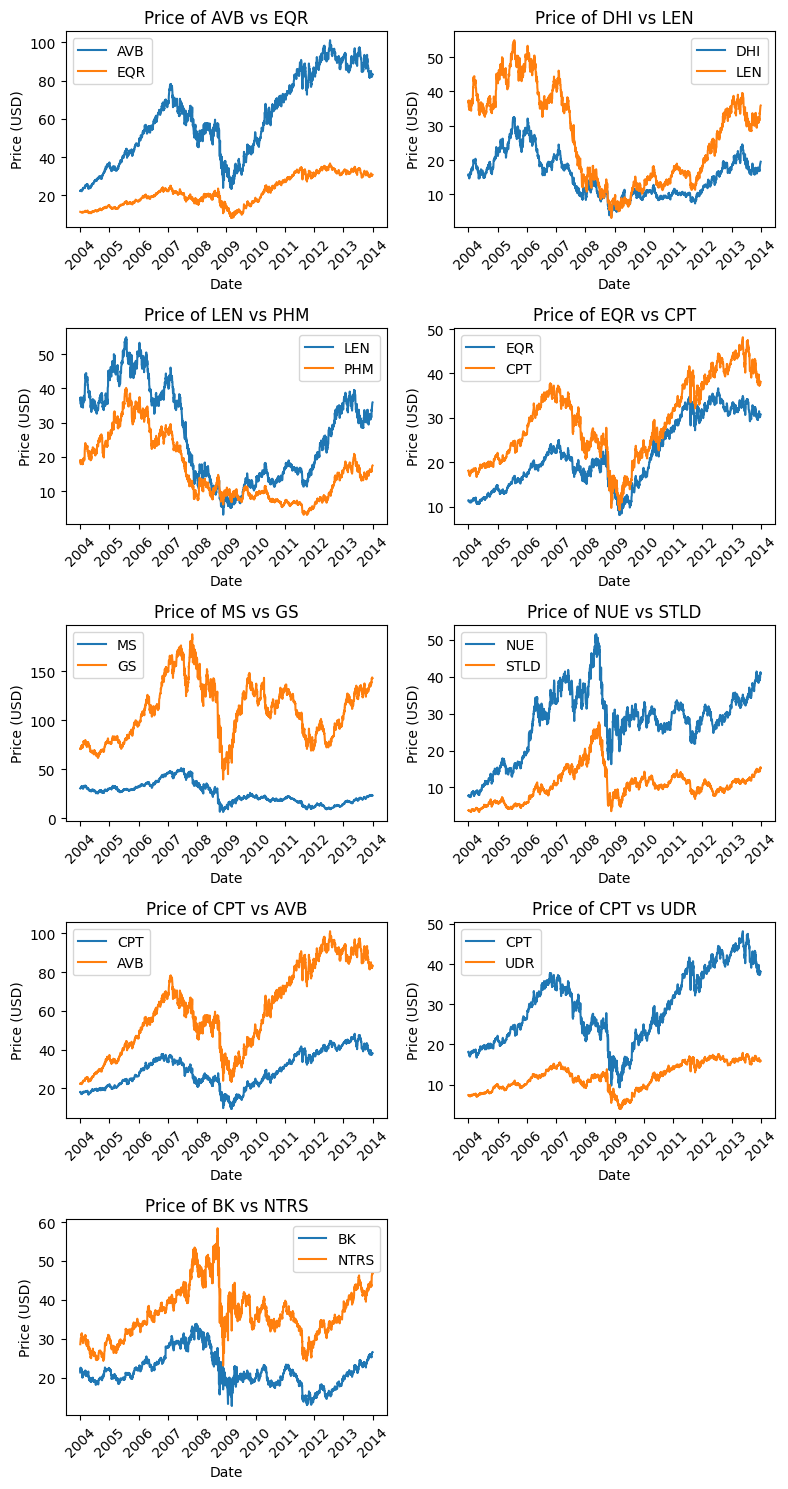

In [ ]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(8,15))
axes = axes.flatten()

for j in range(9):
  ax = axes[j]
  asset1, asset2 = top_10_pairs.iloc[j+1][['Asset 1', 'Asset 2']] # skip GOOGL
  ax.plot(sp500_interesting.index, sp500_interesting[asset1], label=asset1)
  ax.plot(sp500_interesting.index, sp500_interesting[asset2], label=asset2)
  ax.tick_params(axis='x', labelrotation=45)
  ax.set_xlabel('Date')
  ax.set_ylabel('Price (USD)')
  ax.set_title(f"Price of {asset1} vs {asset2}")
  ax.legend()

axes[9].set_visible(False) # hide last empty graph

plt.tight_layout()
plt.show()


Visually, we are able to observe the mean-reverting patterns for some pairs. Here, we give some fundamental explanation on why the pairs may be mean-reverting.

- Equity Residential (EQR), AvalonBay Communities (AVB), Camden Property Trust (CPT), and United Dominion Realty Trust, Inc. (UDR) are real estate investment trusts (REITs) focused on residential properties.  
- Lennar Corporation (LEN), D.R. Horton Inc. (DHI), and PulteGroup, Inc.(PHM) are companies in the homebuilding industry.
- Morgan Stanley (MS) and Goldman Sachs (GS) are global investment banks and provide financial services that operate primarily in capital markets, investment banking, and wealth management.
- Northern Trust Corporation (NTRS) and The Bank of New York Mellon Corporation (BK) are both key players in the financial services sector, specializing in asset management and custody services.
- Steel Dynamics, Inc. (STLD) and Nucor Corporation (NUE) are companies in the steel manufacturing industry.

Due to overlaps, we will proceed with the following pairs.

- EQR vs AVB
- CPT vs UDR
- LEN vs DHI
- MS vs GS
- NTRS vs BK
- STLD vs NUE

In [ ]:
MR_pairs = [("EQR", "AVB"),
            ("CPT", "UDR"),
            ("LEN", "DHI"),
            ("MS", "GS"),
            ("NTRS", "BK"),
            ("STLD", "NUE")]

## Cointegration Testing

For the six chosen pairs, we will use the daily adjusted close price downloaded from 2004-2013 for the Engle-Grangle test.

In [ ]:
sp500_logprice = np.log(sp500_interesting)
# sp500_logprice = sp500_interesting

for pair in MR_pairs:
  asset1, asset2 = pair
  Xt = sp500_logprice[asset1]
  Yt = sp500_logprice[asset2]

  test_cointegration(Xt, Yt, name=f"{asset1} vs {asset2}")

------------------------------------------------------------------
Engle-Granger Test for cointegration for EQR vs AVB

Cointegration test statistic: -2.61
Critical values:
			1%: -3.9
			5%: -3.34
			10%: -3.05
P-value:                      0.232

The series are likely non-cointegrated (fail to reject the null hypothesis).
------------------------------------------------------------------
------------------------------------------------------------------
Engle-Granger Test for cointegration for CPT vs UDR

Cointegration test statistic: -2.7
Critical values:
			1%: -3.9
			5%: -3.34
			10%: -3.05
P-value:                      0.198

The series are likely non-cointegrated (fail to reject the null hypothesis).
------------------------------------------------------------------
------------------------------------------------------------------
Engle-Granger Test for cointegration for LEN vs DHI

Cointegration test statistic: -4.51
Critical values:
			1%: -3.9
			5%: -3.34
			10%: -3.05
P-v

Based on the conintegration tests, the pair with the strongest cointegration is LEN and DHI. We will proceed with only this pair for the subsequent parts of the thesis.

# Strategy Implementation

### Data Preprocessing

Given the sufficient amount of available data, we can afford to work with daily close prices. This alleviates the problem of incorporating trading hours in our model. We use the data from 2004-01-01 to 2013-12-31 for training and the data from 2014-01-01 to 2023-12-31

In [ ]:
assetX = "LEN"
assetY = "DHI"

sp500_final = yf.download([assetX, assetY],
                          start='2010-01-01', # '2004-01-01'
                          end='2017-12-31',   # '2023-12-31'
                          progress=False)['Adj Close']

logprice_final = np.log(sp500_final)
train_df = logprice_final[logprice_final.index < '2014-01-01']
test_df = logprice_final[logprice_final.index >= '2014-01-01']

train_Xt = train_df[assetX].to_numpy()
train_Yt = train_df[assetY].to_numpy()
test_Xt = test_df[assetX].to_numpy()
test_Yt = test_df[assetY].to_numpy()

test_Xprice = np.exp(test_Xt)
test_Yprice = np.exp(test_Yt)

We will do one last visual check for outliers and to confirm the mean reversion behaviour. We will plot the log price of DHI against the price of LEN, and we expect a relatively straight line.

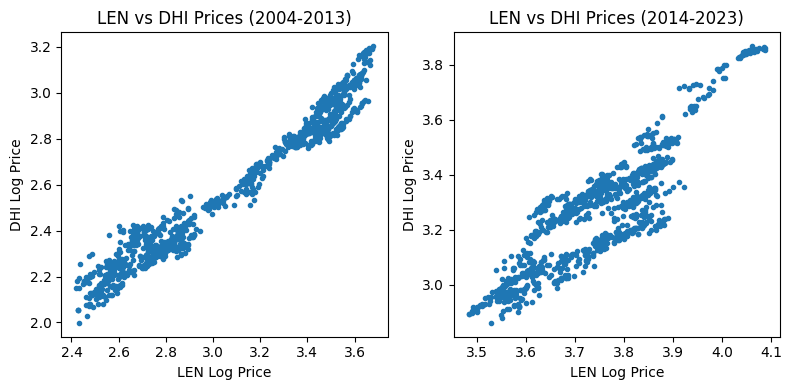

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

axes[0].scatter(train_Xt, train_Yt, marker=".")
axes[0].set_title(f'{assetX} vs {assetY} Prices (2004-2013)')
axes[0].set_xlabel(f'{assetX} Log Price')
axes[0].set_ylabel(f'{assetY} Log Price')

axes[1].scatter(test_Xt, test_Yt, marker=".")
axes[1].set_title(f'{assetX} vs {assetY} Prices (2014-2023)')
axes[1].set_xlabel(f'{assetX} Log Price')
axes[1].set_ylabel(f'{assetY} Log Price')

plt.tight_layout()
plt.show()

### Estimating OU Parameters

We will estimate the OU parameters using the data from the training period only. First, we estimate the cointegration coefficient. Using the cointegration coefficient, we are able to plot and visualize the spread variable.

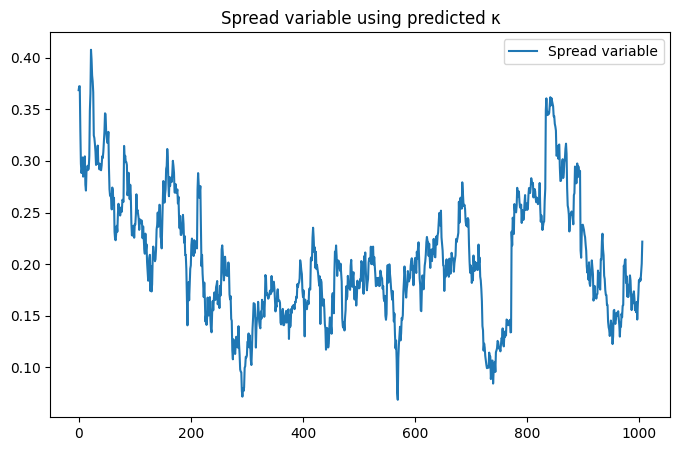

Predicted κ: 0.774


In [ ]:
train_Zt, kappa_pred = get_spread(train_Xt, train_Yt)
plot_series([train_Zt], ["Spread variable"],
            title="Spread variable using predicted κ")

print(f"Predicted κ: {kappa_pred:.3g}")

We can easily estimate the OU parameters by reusing the previously defined function.

In [ ]:
dt = 1
theta_pred, mu_pred, sigma_pred = get_OU_params(train_Zt, dt)

print(f"Predicted θ:  {theta_pred:.3g}")
print(f"Predicted μ:  {mu_pred:.3g}")
print(f"Predicted σ:  {sigma_pred:.3g}")

OU_params_train = [theta_pred, mu_pred, sigma_pred]

Predicted θ:  0.0289
Predicted μ:  0.2
Predicted σ:  0.0134


In particular, we observe that the predicted value of $\mu$ is consistent with previous plot. We also check the ACF plot to see if it is an exponential decay as predicted by theory.

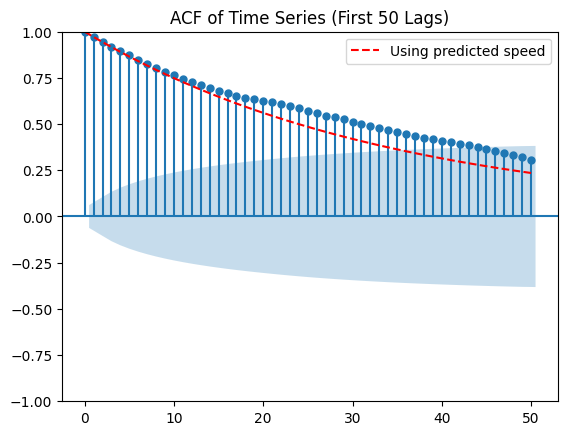

In [ ]:
show_ACF(train_Zt,
         gamma_pred=theta_pred*dt,
         lags=50)

## Generating Trading Signals

With the estimated OU parameters, we are ready to implement the trading on the test period. Using the price data, we will generate the trading signals as done previously.

In [ ]:
test_Zt, _ = get_spread(test_Xt, test_Yt, kappa_overwrite=kappa_pred)
signals = generate_signals(test_Zt, OU_params_train, dt, thresh=1)

Stop loss: 119 periods


Let's do a quick sanity check on the signals.

In [ ]:
check_unwind(signals)

End of check. If there are no other messages, all is good!


We will visualize the signals on the spread data to see when we are entering or exiting a trade.

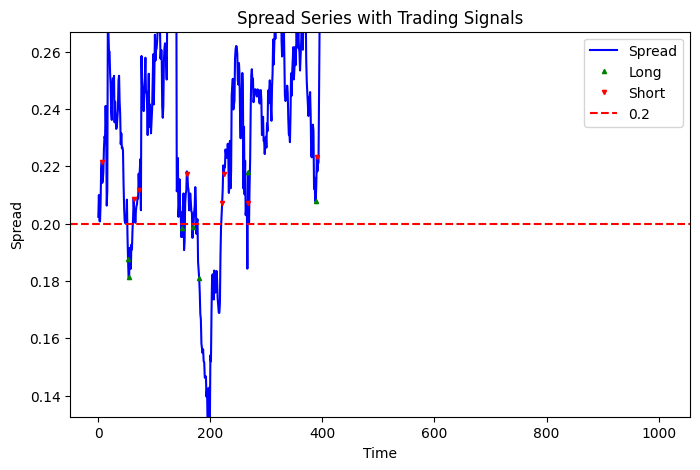

In [ ]:
lo = mu_pred - 5*sigma_pred
mid = mu_pred
hi = mu_pred + 5*sigma_pred
plot_price_series_with_signals(test_Zt, signals,
                               y_hints=[lo,mid,hi])

# Discussions

# Conclusion

# Bibliography

- Avellaneda, Marco, and Jeong-Hyun Lee. ‘Statistical Arbitrage in the US Equities Market’. Quantitative Finance, vol. 10, no. 7, Aug. 2010, pp. 761–82. Taylor and Francis+NEJM, https://doi.org/10.1080/14697680903124632.
- Bali, Turan G., and K. Ozgur Demirtas. Testing Mean Reversion in Stock Market Volatility. 936647, 1 Sept. 2006. Social Science Research Network, https://doi.org/10.2139/ssrn.936647.
- Balvers, Ronald J., and Yangru Wu. ‘Momentum and Mean Reversion across National Equity Markets’. Journal of Empirical Finance, vol. 13, no. 1, Jan. 2006, pp. 24–48. ScienceDirect, https://doi.org/10.1016/j.jempfin.2005.05.001.
- Bertram, William Karel. Analytic Solutions for Optimal Statistical Arbitrage Trading. 1505073, 12 Nov. 2009. Social Science Research Network, https://doi.org/10.2139/ssrn.1505073.
- Engle, Robert F., and C. W. J. Granger. ‘Co-Integration and Error Correction: Representation, Estimation, and Testing’. Econometrica, vol. 55, no. 2, 1987, pp. 251–76. JSTOR, https://doi.org/10.2307/1913236.
- Exley, Jon, et al. MEAN REVERSION. Oct. 2011.
- Granger, C. W. J. ‘Some Properties of Time Series Data and Their Use in Econometric Model Specification’. Journal of Econometrics, vol. 16, no. 1, May 1981, pp. 121–30. ScienceDirect, https://doi.org/10.1016/0304-4076(81)90079-8.
- Johansen, Søren. ‘Estimation and Hypothesis Testing of Cointegration Vectors in Gaussian Vector Autoregressive Models’. Econometrica, vol. 59, no. 6, 1991, pp. 1551–80. JSTOR, https://doi.org/10.2307/2938278.
- Leung, Tim, and Xin Li. Optimal Mean Reversion Trading with Transaction Costs and Stop-Loss Exit. arXiv:1411.5062, arXiv, 14 May 2015. arXiv.org, https://doi.org/10.48550/arXiv.1411.5062.
- Lubnau, Thorben, and Neda Todorova. ‘Trading on Mean-Reversion in Energy Futures Markets’. Energy Economics, vol. 51, Sept. 2015, pp. 312–19. ScienceDirect, https://doi.org/10.1016/j.eneco.2015.06.018.
- Spierdijk, Laura, et al. ‘Mean Reversion in International Stock Markets: An Empirical Analysis of the 20th Century’. Journal of International Money and Finance, vol. 31, no. 2, Mar. 2012, pp. 228–49. ScienceDirect, https://doi.org/10.1016/j.jimonfin.2011.11.008.
- Tang, Cheng Yong, and Song Xi Chen. ‘Parameter Estimation and Bias Correction for Diffusion Processes’. Journal of Econometrics, vol. 149, no. 1, Apr. 2009, pp. 65–81. ScienceDirect, https://doi.org/10.1016/j.jeconom.2008.11.001.
- Toit, Ruth du. ‘An Introduction to Cointegration for Pairs Trading’. Hudson & Thames, 19 Jan. 2021, https://hudsonthames.org/an-introduction-to-cointegration/.
- Uhlenbeck, G. E., and L. S. Ornstein. ‘On the Theory of the Brownian Motion’. Physical Review, vol. 36, no. 5, Sept. 1930, pp. 823–41. APS, https://doi.org/10.1103/PhysRev.36.823.
- Velissaris, James. Diversified Statistical Arbitrage: Dynamically Combining Mean Reversion and Momentum Strategies. 1666799, 13 Mar. 2010. Social Science Research Network, https://doi.org/10.2139/ssrn.1666799.
- Wilder, J. Welles. New Concepts in Technical Trading Systems. Trend Research, 1978.